In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("bench.csv")

In [7]:
print("Shape:", df.shape)
print(df.head())

Shape: (150, 9)
      m     n     k    b  p  q algo  lookahead      gflops
0  1024  1024  1024  256  2  2  p2p          0   56.171265
1  1024  1024  1024  256  2  2  p2p          0  127.250743
2  1024  1024  1024  256  2  2  p2p          0  127.651651
3  1024  1024  1024  256  2  2  p2p          0  124.999052
4  1024  1024  1024  256  2  2  p2p          0  126.897344


In [8]:
# Ajouter une colonne 'size' pour n = m = k
df["size"] = df["n"]  # ou moyenne des trois si elles sont différentes

In [9]:
# Calculer les moyennes et écart-types
df_grouped = df.groupby(["size", "algo", "lookahead"]).agg(
    mean_gflops=("gflops", "mean"),
    std_gflops=("gflops", "std")
).reset_index()

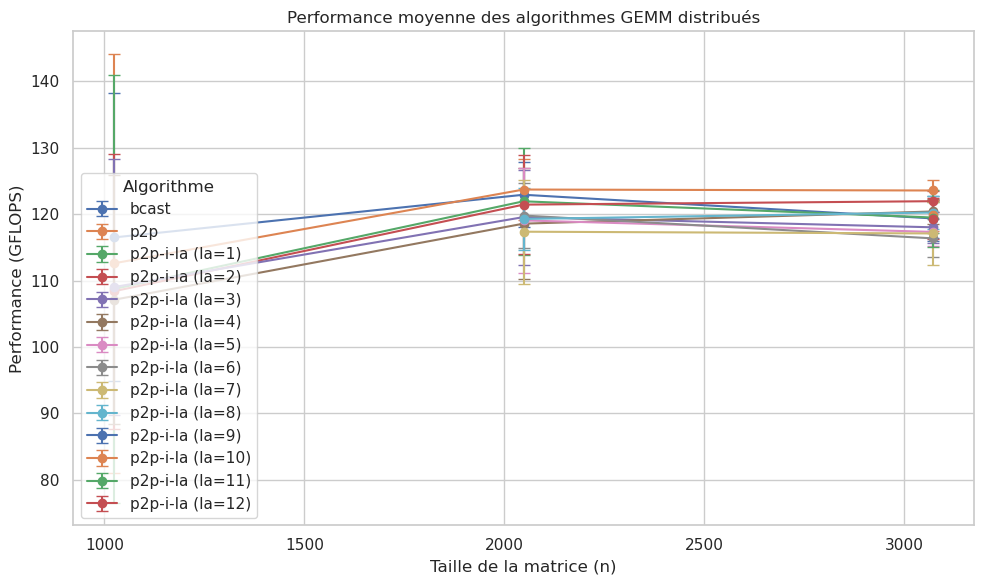

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

for algo in df_grouped["algo"].unique():
    data = df_grouped[df_grouped["algo"] == algo]
    label = f"{algo}"
    if algo == "p2p-i-la":
        # Afficher aussi le lookahead si pertinent
        for la in sorted(data["lookahead"].unique()):
            subdata = data[data["lookahead"] == la]
            plt.errorbar(
                subdata["size"], subdata["mean_gflops"], yerr=subdata["std_gflops"],
                label=f"{algo} (la={la})", marker="o", capsize=4
            )
    else:
        plt.errorbar(
            data["size"], data["mean_gflops"], yerr=data["std_gflops"],
            label=label, marker="o", capsize=4
        )

plt.title("Performance moyenne des algorithmes GEMM distribués")
plt.xlabel("Taille de la matrice (n)")
plt.ylabel("Performance (GFLOPS)")
plt.legend(title="Algorithme")
plt.tight_layout()
plt.savefig("benchmarks_gemm_distribues.png")
plt.show()